## Task 7: Матрица рассеяния (scatter matrix)

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

### 1. Создайте датафрейм, в котором для каждого пользователя тестовой группы имеется среднее значение дельты, количество просмотров страниц и количество коммитов.
### 2.Не учитывайте лабораторное задание project1 при расчете среднего значения дельты и количества коммитов.
### 3. Возьмите количество коммитов из таблицы checker.
### 4.Используйте фильтр status = 'ready' для коммитов.

In [3]:
df = pd.read_sql("""SELECT
	t1.uid,
	delta as avg_diff,
	viewscount as pageviews,
	num_commits
FROM
(select
	uid,
	count() as num_commits
from 
	checker
where
	status = 'ready' and labname <> 'project1' and checker.uid like 'user_%'
group by
	uid) as t1
JOIN
(SELECT 
	uid,
	COUNT() as viewscount
FROM
	pageviews
GROUP bY 
	uid) as t2
ON
	t1.uid = t2.uid
JOIN
(SELECT
	uid,
	AVG( (strftime ('%s', first_commit) - deadlines) /3600) as delta
FROM
(SELECT
	MIN(checker.timestamp) as first_commit,
	checker.uid,
	checker.labname
FROM 
	checker
JOIN 
	pageviews 
ON 
	pageviews.uid = checker.uid
WHERE
	status = 'ready' AND numTrials = 1 AND labname!='project1' AND checker.uid LIKE 'user_%'
GROUP by 
	checker.uid, labname) as t1
JOIN 
	deadlines 
ON 
	labname=labs
GROUP BY 
	uid) as t3
ON 
	t1.uid=t3.uid
""", con)

In [4]:
df

,uid,avg_diff,pageviews,num_commits
0,user_1,-64.400000,28,35
1,user_10,-74.800000,89,13
2,user_14,-159.000000,143,33
3,user_17,-61.600000,47,29
4,user_18,-5.666667,3,4
5,user_19,-98.750000,16,62
6,user_21,-95.500000,10,35
7,user_25,-92.600000,179,43
8,user_28,-86.400000,149,33
9,user_3,-105.400000,317,13


### 5. Размер figsize остается прежним; размер шрифта и цветовую палитру можно выбрать по своему усмотрению.
### 6. Размер точек — 200.
### 7. Ширина линий на графиках, расположенных по главной диагонали (kde) — 3.

array([[<AxesSubplot:xlabel='avg_diff', ylabel='avg_diff'>,
        <AxesSubplot:xlabel='pageviews', ylabel='avg_diff'>,
        <AxesSubplot:xlabel='num_commits', ylabel='avg_diff'>],
       [<AxesSubplot:xlabel='avg_diff', ylabel='pageviews'>,
        <AxesSubplot:xlabel='pageviews', ylabel='pageviews'>,
        <AxesSubplot:xlabel='num_commits', ylabel='pageviews'>],
       [<AxesSubplot:xlabel='avg_diff', ylabel='num_commits'>,
        <AxesSubplot:xlabel='pageviews', ylabel='num_commits'>,
        <AxesSubplot:xlabel='num_commits', ylabel='num_commits'>]],
      dtype=object)

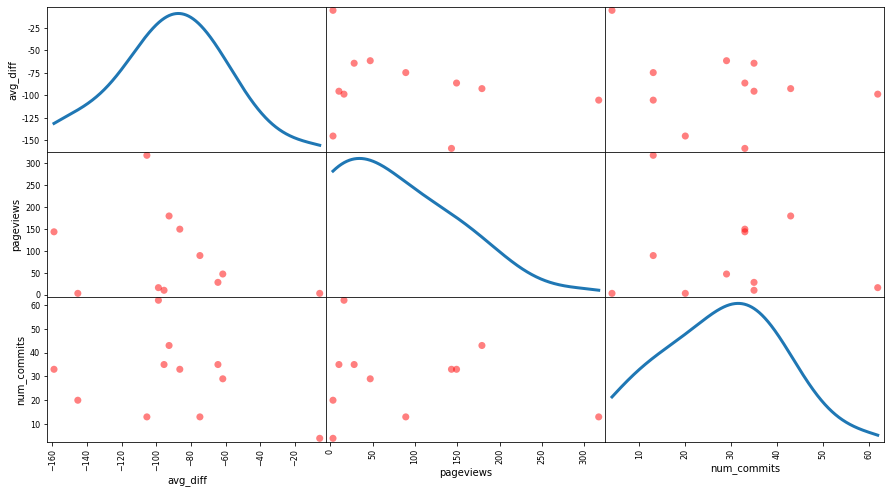

In [5]:
pd.plotting.scatter_matrix(df, figsize=(15, 8), diagonal='kde', density_kwds={'linewidth': 3}, s=200, color='red')

### 8. В конце Jupyter Notebook создайте markdown-ячейку и вставьте в нее следующие вопросы.
- «Верно ли, что если у пользователя меньше просмотров страницы, то он, скорее всего, имеет меньшее число коммитов?». Ответ: да или нет.

Ответ: нет

- «Верно ли, что если у пользователя меньше просмотров страницы, то, скорее всего, у него будет небольшое среднее значение дельты (разница между датой первого коммита и сроком сдачи лабораторного задания)?». Ответ: да или нет.

Ответ: нет

- «Верно ли, что существует много пользователей с небольшим количеством коммитов и мало пользователей с большим количеством коммитов?». Ответ: да или нет.

Ответ: да

- «Верно ли, что существует много пользователей с небольшим средним значением дельты и мало пользователей с большим средним значением дельты?». Ответ: да или нет.

Ответ: нет